# Text-to-Text Similarity : Lin 1998

The Lin measure builds on Resnik's idea of Information Content and adds a normalization factor consisting of the IC of the two input concepts.

$$
Sim_{lin} = \frac{2*IC(LCS)}{IC(concept_{1}) + IC(concept_{2})}
$$

The intuition is that the IC of the LCS represents the shared attributes of $concept_{1}$ and $concept_{2}$ and that is then normalized by all their attributes. So the Lin score gives one a similiarity measure which draws on the attributes concepts share and the attributes that make them different. Notice that if 2 concepts share all the same attributes their IC will be the same and equivalent to $2*IC(LCS)$ such that their similarity is 1. 

#### References

1. [Lin 1998 - An Information Theoretic Definition of Similarity](./papers/Lin_1998-an-information-theoretic-definition-of-similarity.pdf)

In [4]:
import sys
import numpy as np
sys.path.append('../')
import libs.utils as utils
import libs.stats as stats
import libs.preprocessing as pp
import libs.text2text as tt
from importlib import reload
from nltk.corpus import wordnet_ic
import spacy

<module 'libs.text2text' from '../libs/text2text.py'>

In [2]:
# Load Dataset
df2_en = utils.load_dataframe(language='en', version=2)
print(len(df2_en))

nlp_en = spacy.load('en')

# prepare the corpus for calculating IC
brown_ic = wordnet_ic.ic('ic-brown.dat')

2442


## E1.1 v2.0_en Lin [Brown]

In [5]:
lin_func = tt.create_lin_function(brown_ic)

e11_res = tt.run_entailment_model(nlp_en, df2_en, 
                                  sim_fn=lin_func, 
                                  lang='eng',
                                  stop_words=pp.EN_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADJ'])

batch: 300 done.
batch: 600 done.
batch: 900 done.
batch: 1200 done.
batch: 1500 done.
batch: 1800 done.
batch: 2100 done.
batch: 2400 done.


Accuracy: 23.423%
Precision: 52.846%
Recall: 23.423%
F1-Measure: 28.222%
Pearson's R: 0.28
Cohen's Kappa: 0.07
RMSE: 1.98
MAE: 1.50
Y-True Mean: 4.15
Y-Pred Mean: 2.89
Y-True Std Deviation: 1.12
Y-Pred Std Deviation: 1.39


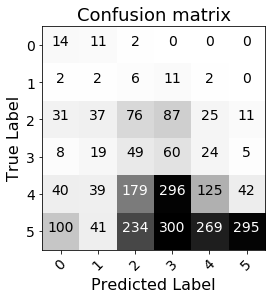

In [6]:
stats.print_big4(e11_res['y_true'], e11_res['y_pred'])
stats.print_stats(e11_res['y_true'], e11_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e11_res['y_true'], e11_res['y_pred']), classes=np.unique(e11_res['y_true']))

## E1.2 v1.0_en Lin [Brown Corpus]

In [7]:
# Load Dataset
df1_en = utils.load_dataframe(language='en', version=1)
print(len(df1_en))

e12_res = tt.run_entailment_model(nlp_en, df1_en, 
                                  sim_fn=lin_func, 
                                  lang='eng',
                                  stop_words=pp.EN_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADJ'])

630
batch: 300 done.
batch: 600 done.


Accuracy: 27.460%
Precision: 50.283%
Recall: 27.460%
F1-Measure: 30.856%
Pearson's R: 0.29
Cohen's Kappa: 0.11
RMSE: 1.83
MAE: 1.34
Y-True Mean: 4.03
Y-Pred Mean: 3.00
Y-True Std Deviation: 1.18
Y-Pred Std Deviation: 1.34


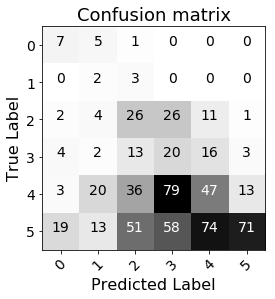

In [8]:
stats.print_big4(e12_res['y_true'], e12_res['y_pred'])
stats.print_stats(e12_res['y_true'], e12_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e12_res['y_true'], e12_res['y_pred']), classes=np.unique(e12_res['y_true']))